# Grafritning med data i skriptfilen
Vad kan vi göra med `matplotlib` och hur kan vi inkludera mätdata i vårt skript?

Först några bibliotek som ska inkluderas:

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import markers as markers
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
import ipywidgets as widgets
from ipywidgets import interact

Biblioteket `io` innehåller funktionen `StringIO` som vi behöver

In [13]:
from io import StringIO

Det följande blocket innehåller mätdata i form av fyra kolumner:

1. x-värden
2. y-värden
3. mätosäkerhet i x
4. mätosäkerhet i y

In [14]:
datafile = StringIO(\
'''
-0.01  0.063  0.10  0.000
 0.51  0.297  0.10  0.013
 1.06  0.804  0.10  0.050
 1.53  2.189  0.10  0.113
 1.88  4.069  0.10  0.200
 2.48  6.243  0.10  0.312
 2.94  9.091  0.10  0.450
 3.45 12.303  0.10  0.613
 4.01 16.079  0.10  0.800
 4.41 20.212  0.10  1.012
 5.23 25.060  0.10  1.250
 5.38 30.215  0.10  1.513
 5.97 36.121  0.10  1.800
 6.66 41.957  0.10  2.113
 7.08 48.867  0.10  2.450
 7.56 56.299  0.10  2.812
 7.88 63.906  0.10  3.200
 8.67 72.213  0.10  3.613
 8.98 81.196  0.10  4.050
 9.41 90.252  0.10  4.513
''')

Funktionen `loadtxt()` från biblioteket `numpy` ger oss möjligheten att ladda in data från en textfil eller från ett textblock som här. 

In [15]:
x, y, dx, dy = np.loadtxt(datafile, unpack=True)

Vi kan först göra en snabb ritning för att se hur datan ser ut. <br>
Standardvärden från `matplotlib` ger oss en linjegraf:

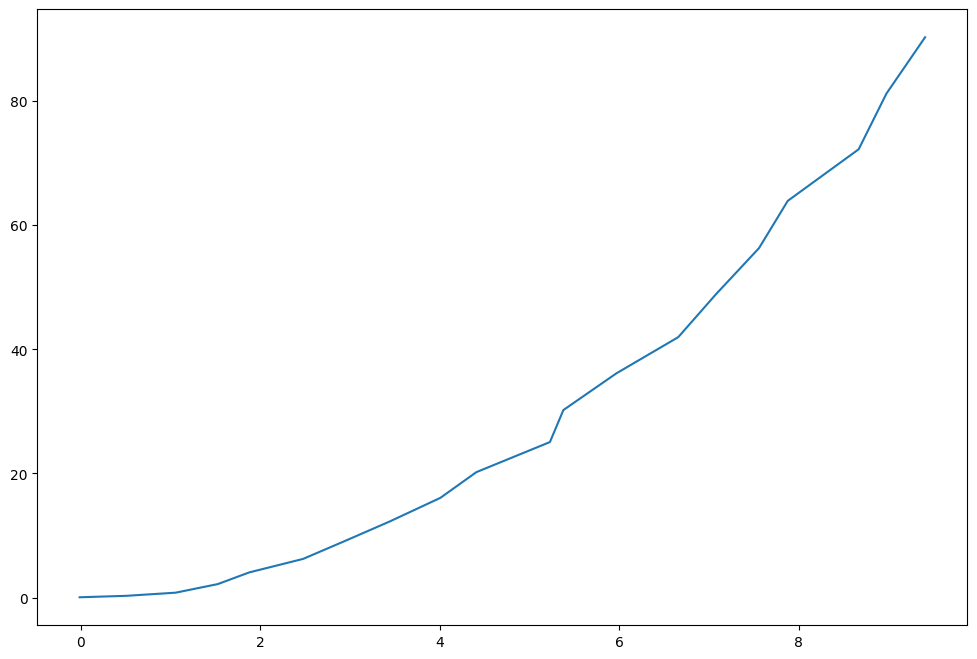

In [16]:
fig, ax = plt.subplots()
ax.plot(x,y)

Biblioteket `matplotlib` har ett antal olika symboler för att markera datapunkter i en graf. Den finns även tillgänglig som en Python _dictionary_, dock med _value_ och _key_ i omvänd ordning vad jag vill ha näst. 

In [ ]:
markerdict = {value:key for key, value in markers.MarkerStyle.markers.items()}
print(markers.MarkerStyle.markers)
print("\nblir istället\n")
print(markerdict)

{'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', 'none': 'nothing', ' ': 'nothing', '': 'nothing'}

blir istället

{'point': '.', 'pixel': ',', 'circle': 'o', 'triangle_down': 'v', 'triangle_up': '^', 'triangle_left': '<', 'triangle_right': '>', 'tri_down': '1', 'tri_up': '2', 'tri_left': '3', 'tri_right': '4', 'octagon': '8', 'square': 's', 'pentagon': 'p', 'star': '*', 'hexagon1': 'h', 'hexagon2': 'H', '

Nu blir vi interaktiva - här kan du testa olika inställningar i `matplotlib`s vanliga `.plot()`-kommando. 

In [ ]:
style= {'description_width': '150px'}
layout= {'width': '50%'}
@interact
def _(
    pltfacecolor    = widgets.ColorPicker(description="bakgrundsfärg", value="white", style=style, layout=layout),
    figfacecolor    = widgets.ColorPicker(description="yttre bakgrundsfärg", value="white", style=style, layout=layout),
    color           = widgets.ColorPicker(description="färg", value="blue", style=style, layout=layout),
    linestyle       = widgets.Dropdown(description="typ av linje", options={"heldragen":"-","streckad":"--","streck med punkt":"-.","punkterad":":","ingen linje":""}, size=1, style=style, layout=layout),
    linewidth       = widgets.IntSlider(description="linjebredd", value=1, min=0, max=10, continuous_update=False, style=style, layout=layout),
    marker          = widgets.Dropdown(description="markör", options=markerdict, style=style, layout=layout),
    markersize      = widgets.IntSlider(description="storlek av markören",value=10, min=1, max=100, continuous_update=False, style=style, layout=layout),
    markerfacecolor = widgets.ColorPicker(description="färg på markören", claue="red", style=style, layout=layout),
    markeredgewidth = widgets.IntSlider(description="rand på markören", value=10, min=1, max=100, continuous_update=False, style=style, layout=layout),
    markeredgecolor = widgets.ColorPicker(description="färg av randen", value="blue", style=style, layout=layout),
    ticktextsize    = widgets.IntSlider(description="textstorlek siffror",value=18, min=5, max=100, continuous_update=False, style=style, layout=layout),
    axeslabels      = widgets.Checkbox(value=False, description="visa text på axlarna", style=style, layout=layout),
    labelsize       = widgets.IntSlider(description="textstorlek axeltext",value=18, min=5, max=100, continuous_update=False, style=style, layout=layout),
    ):
    print(f"""# Följande kommando(n) ger oss grafen nedan:

    fig, ax = plt.subplots()
    ax.xaxis.set_tick_params(labelsize={ticktextsize})
    ax.yaxis.set_tick_params(labelsize={ticktextsize})
    fig.set_facecolor(color="{figfacecolor}")
    ax.set_facecolor(color="{pltfacecolor}")

    ax.plot(
        x, y,
        color = "{color}",
        linestyle = "{linestyle}",
        linewidth = {linewidth},
        marker = "{marker}",
        markersize = {markersize},
        markerfacecolor = "{markerfacecolor}",
        markeredgecolor = "{markeredgecolor}",
        markeredgewidth = {markeredgewidth},
    )""")

    fig, ax = plt.subplots()
    ax.xaxis.set_tick_params(labelsize=ticktextsize)
    ax.yaxis.set_tick_params(labelsize=ticktextsize)
    fig.set_facecolor(color=figfacecolor)
    ax.set_facecolor(color=pltfacecolor)
    ax.plot(
        x, y,
        color = color,
        linestyle = linestyle,
        linewidth = linewidth,
        marker = marker,
        markersize = markersize,
        markerfacecolor = markerfacecolor,
        markeredgecolor = markeredgecolor,
        markeredgewidth = markeredgewidth,
    )
    if axeslabels:
        ax.set_xlabel('text på x-axeln [enhet]', fontsize=labelsize)
        ax.set_ylabel('text på y-axeln [enhet]', fontsize=labelsize)
        print(
            f"    ax.set_xlabel('text på x-axeln [enhet]', fontsize={labelsize})\n"
            f"    ax.set_ylabel('text på y-axeln [enhet]', fontsize={labelsize})"
        )
    plt.show()


interactive(children=(ColorPicker(value='white', description='bakgrundsfärg', layout=Layout(width='50%'), styl…

Utöver `plot()` finns även kommandon som direkt skapar grafer med logaritmiska axlar.

### `semilogy` - en logaritmisk y-axel och en linjär x-axel
Vi kommer använda den här typen av graf speciellt i Labb 6 när vi analyserar ett exponentiellt beroende.

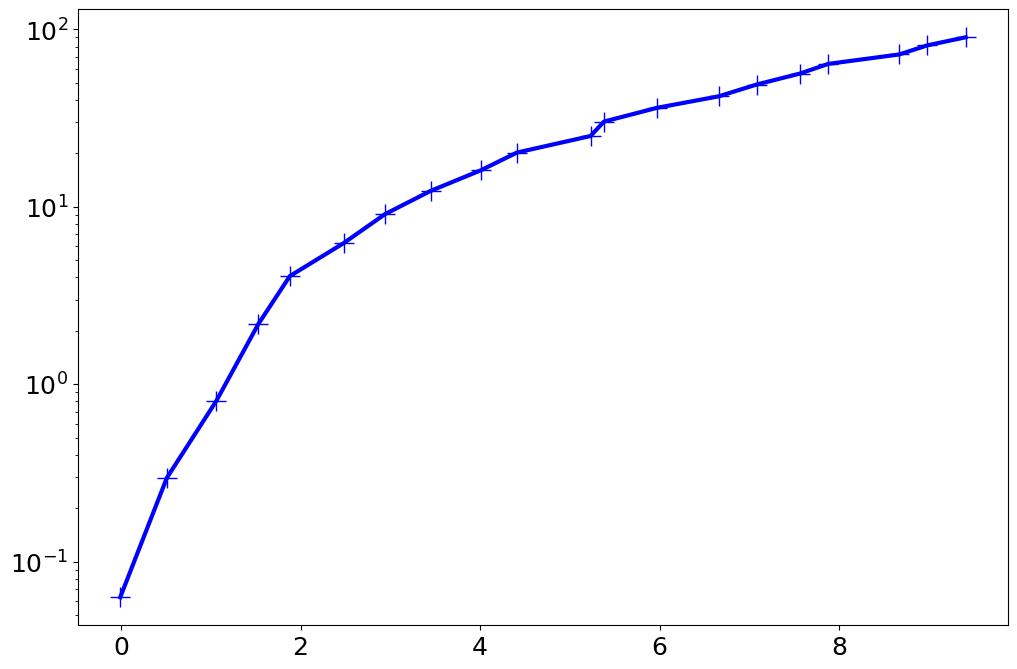

In [ ]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.semilogy(
    x, y,
    color = "blue",
    linestyle = "-",
    linewidth = 3,
    marker = "+",
    markersize = 15,
)

### `semilogx` - en logaritmisk x-axel och en linjär y-axel
Vi har sett denna typ av plot när vi mätte på och räknade med våra filterkretsar. Där hade vi frekvensen på den logaritmiska x-axeln.

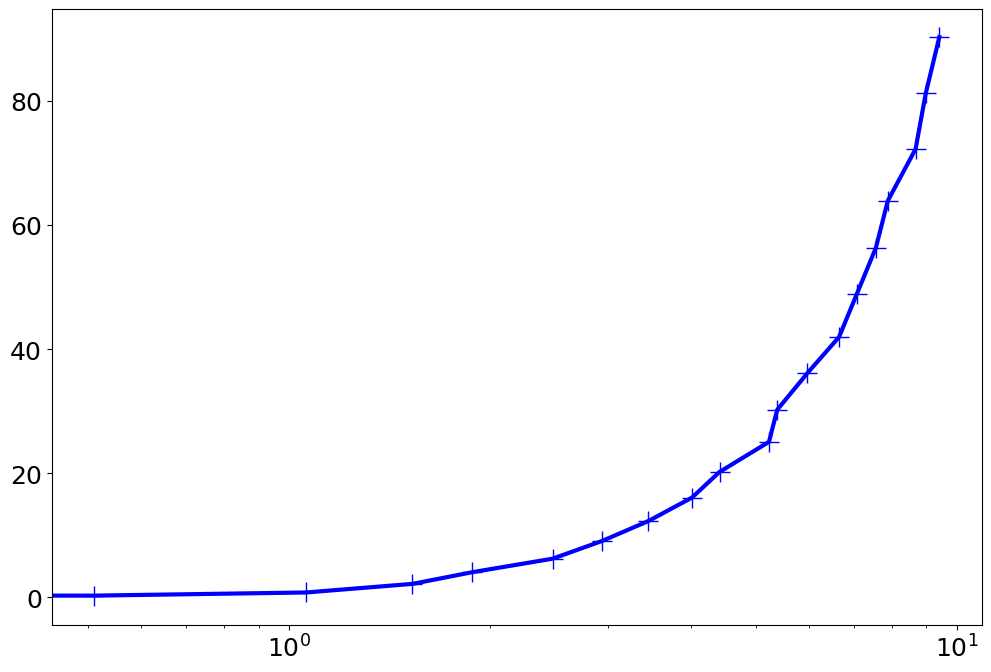

In [20]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.semilogx(
    x, y,
    color = "blue",
    linestyle = "-",
    linewidth = 3,
    marker = "+",
    markersize = 15,
)

### `loglog` - en logaritmisk x-axel och en logaritmisk y-axel

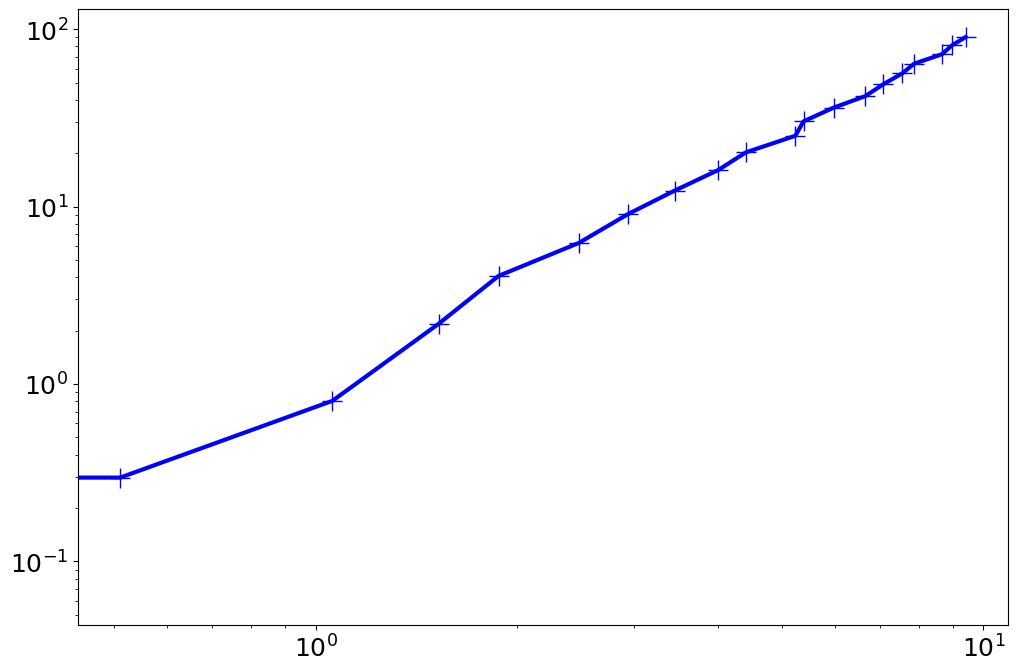

In [21]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.loglog(
    x, y,
    color = "blue",
    linestyle ="-",
    linewidth = 3,
    marker = "+",
    markersize = 15,
)

## Felmarginaler
Våra datapunkter ovan kom med värden i `x` och `y`, men även med felmarginaler `dx` och `dy` för varje mätpunkt. Dass kan visualiseras med hjälp av plot-funktionen `errorbars()`. Obs att den första parametern är `dy` eftersom det är vanligt att enbart visa ett fel i y-riktningen. 

In [ ]:
@interact
def _(
    plot_dx = widgets.Checkbox(value=True, description="visa fel Δx"),
    plot_dy = widgets.Checkbox(value=True, description="visa fel Δy"),
    ):
    print("""# Följande kommando(n) ger oss grafen nedan:

    fig, ax = plt.subplots()
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.errorbar(
        x, y, {:s}, {:s},
        color = "blue",
        linestyle = "",
        marker = ".",
    )""".format("dy" if plot_dy else "None","dx" if plot_dx else "None"))

    fig, ax = plt.subplots()
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)
    ax.errorbar(
        x, y, dy if plot_dy else None, dx if plot_dx else None,
        color = "blue",
        linestyle = "",
        marker = "."
    )
    plt.show()

interactive(children=(Checkbox(value=True, description='visa fel Δx'), Checkbox(value=True, description='visa …